<a href="https://colab.research.google.com/github/bobbyknit007/ML/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

#Read the csv file , understand contents
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
print('Data Set has rows {}, columns {}'.format( df.shape[0], df.shape[1]))
print('Data set has columns {}'.format(df.columns.values))

Data Set has rows 4340, columns 8
Data set has columns ['name' 'year' 'selling_price' 'km_driven' 'fuel' 'seller_type'
 'transmission' 'owner']


In [7]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [8]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [10]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [13]:
df=df.drop_duplicates()
df.shape

(3577, 8)

In [14]:

#Look for unique values in each column
for col in df.columns:
  print('Column {} has {} unique values'.format(col,df[col].nunique()))


Column name has 1491 unique values
Column year has 27 unique values
Column selling_price has 445 unique values
Column km_driven has 770 unique values
Column fuel has 5 unique values
Column seller_type has 3 unique values
Column transmission has 2 unique values
Column owner has 5 unique values


In [65]:
df['company'] =df['name'].map(lambda x : x.split(' ')[0])

unique_car_company=df['company'].unique()
type(unique_car_company)
#print(unique_car_company)
#df['company_num']=df['company'].map(lambda x : unique_car_company[x])

numpy.ndarray

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder();
df['company_enc']=le.fit_transform(df['company'])
df['fuel_enc']=le.fit_transform(df['fuel'])
df['seller_type_enc']=le.fit_transform(df['seller_type'])
df['transmission_enc']=le.fit_transform(df['transmission'])
df['owner_enc']=le.fit_transform(df['owner'])

In [77]:
df[['owner_enc','owner']].value_counts()

,,count
owner_enc,owner,
0,First Owner,2218
2,Second Owner,978
4,Third Owner,289
1,Fourth & Above Owner,75
3,Test Drive Car,17


In [67]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company,company_enc,fuel_enc,seller_type_enc,transmission_enc,owner_enc
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,18,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,18,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,10,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,5,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,9,1,1,1,2


<Axes: xlabel='company', ylabel='selling_price'>

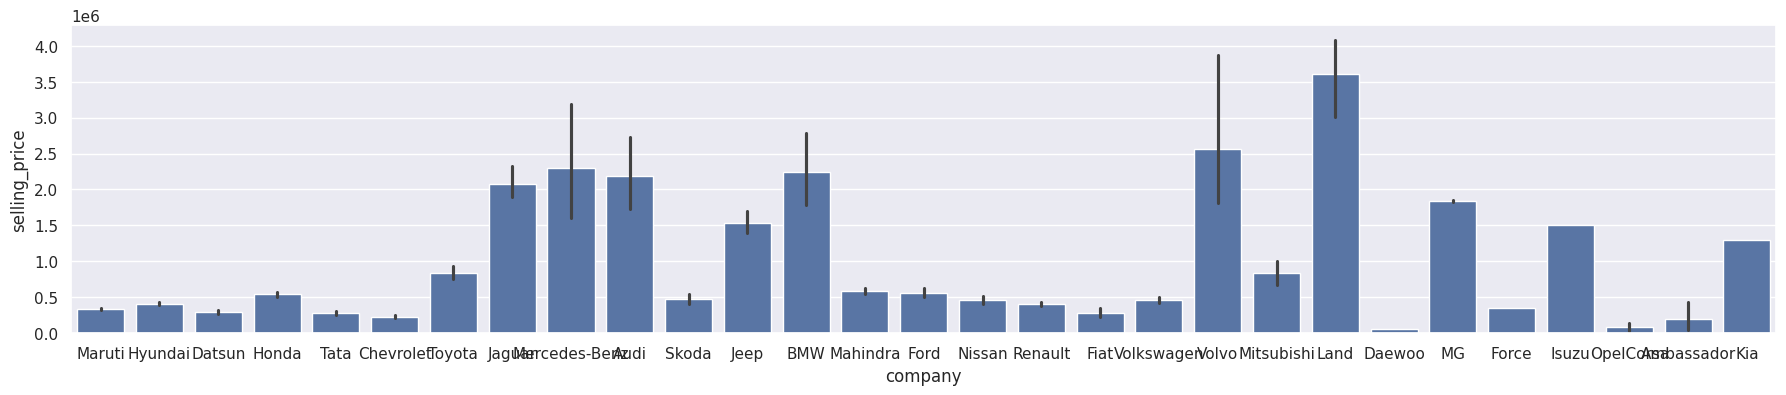

In [37]:
sns.set(rc={"figure.figsize":(22, 4)})
sns.barplot(x ='company', y ='selling_price', data = df)

<Axes: xlabel='transmission', ylabel='selling_price'>

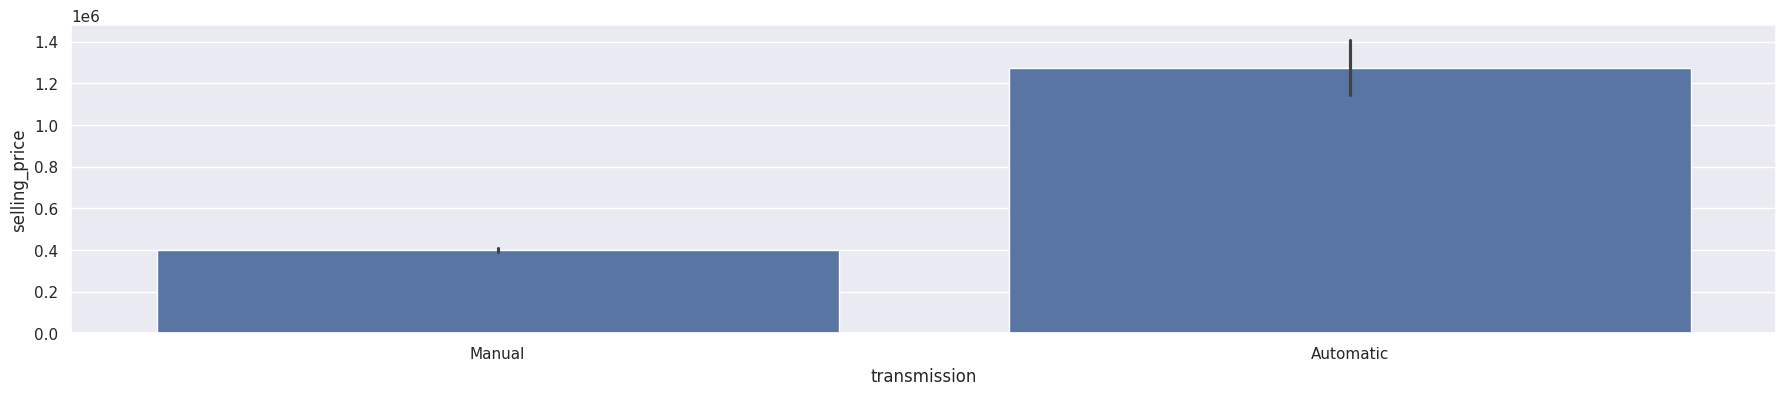

In [38]:
sns.barplot(x ='transmission', y ='selling_price', data = df)

<Axes: xlabel='fuel', ylabel='selling_price'>

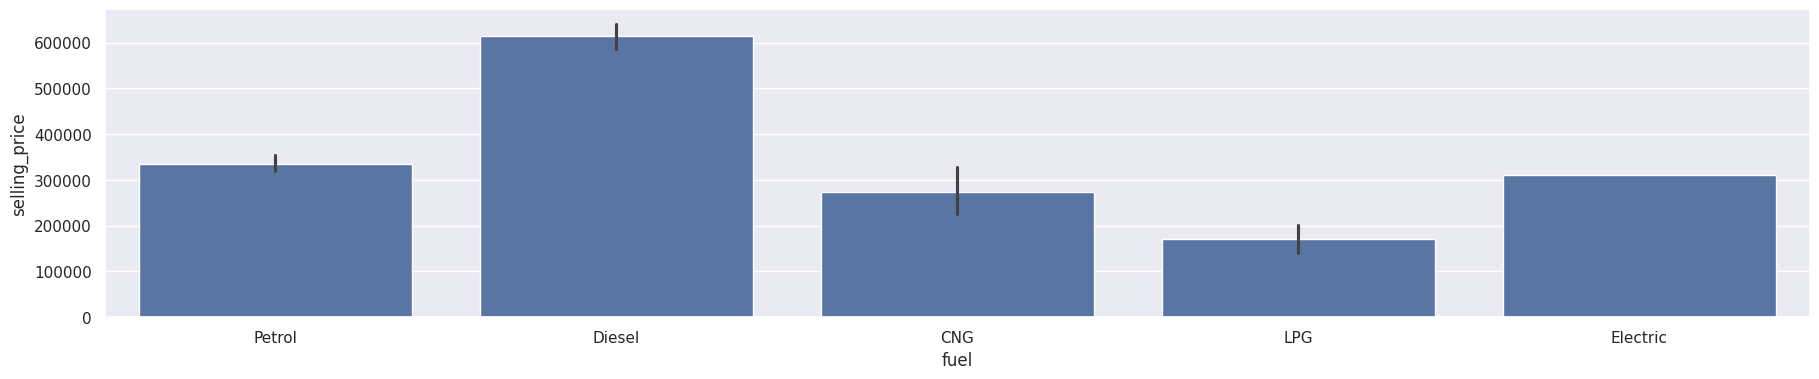

In [39]:
sns.barplot(x ='fuel', y ='selling_price', data = df)

<Axes: xlabel='owner', ylabel='selling_price'>

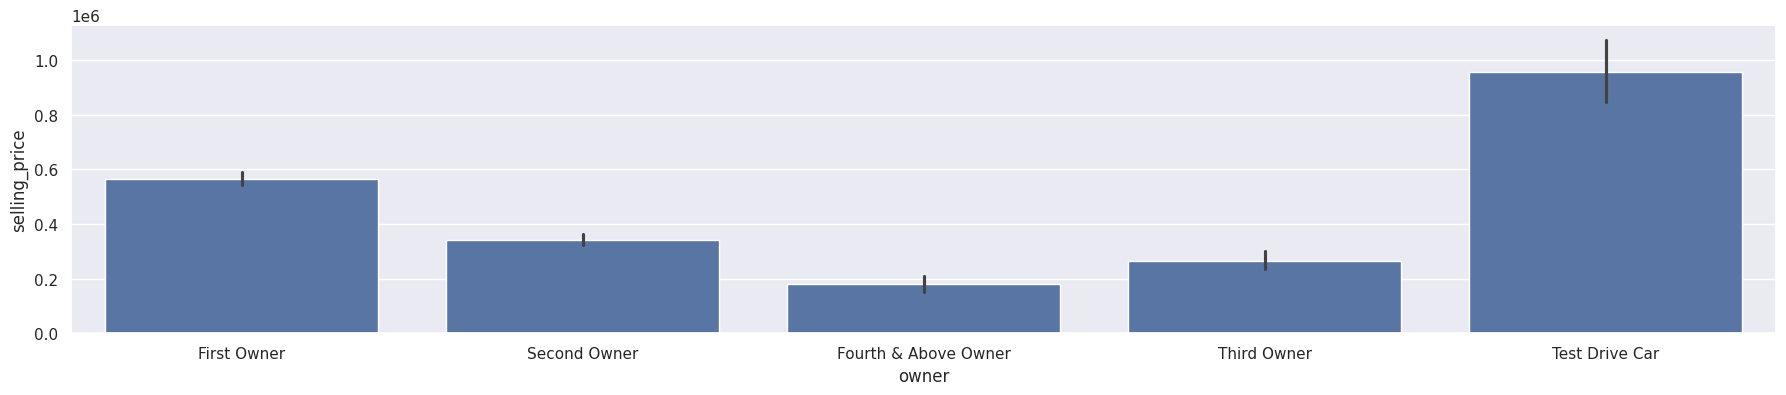

In [41]:
sns.barplot(x ='owner', y ='selling_price', data = df)


In [78]:
df[['owner_enc','owner']].value_counts()

,,count
owner_enc,owner,
0,First Owner,2218
2,Second Owner,978
4,Third Owner,289
1,Fourth & Above Owner,75
3,Test Drive Car,17


<Axes: xlabel='km_driven', ylabel='selling_price'>

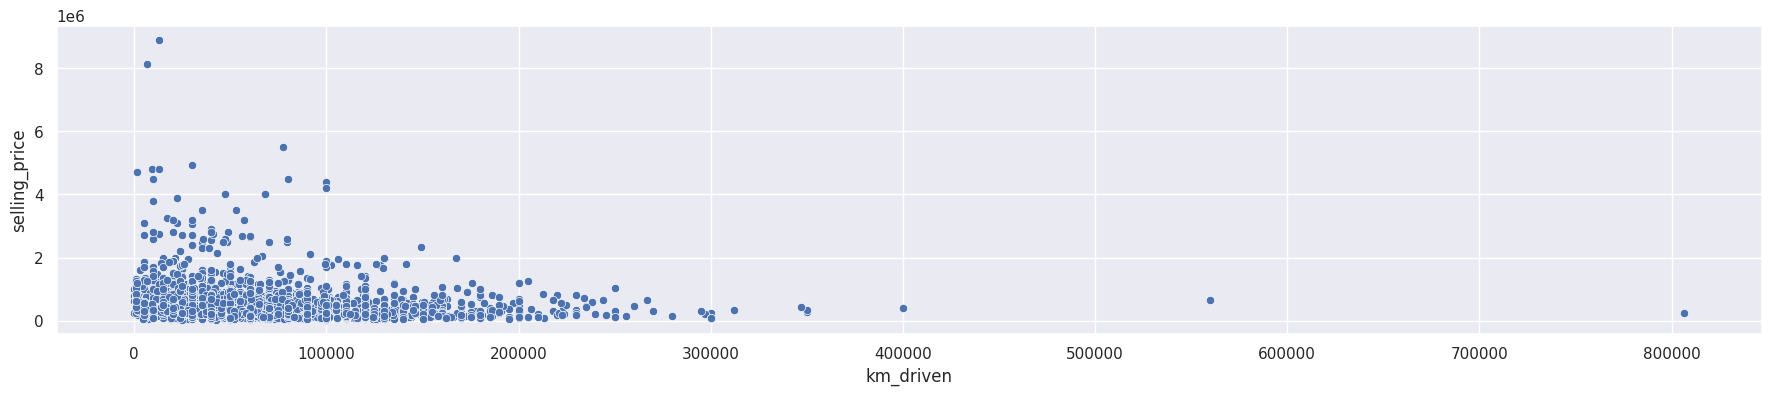

In [42]:
sns.scatterplot(data=df, x='km_driven', y='selling_price')

<Axes: xlabel='year', ylabel='selling_price'>

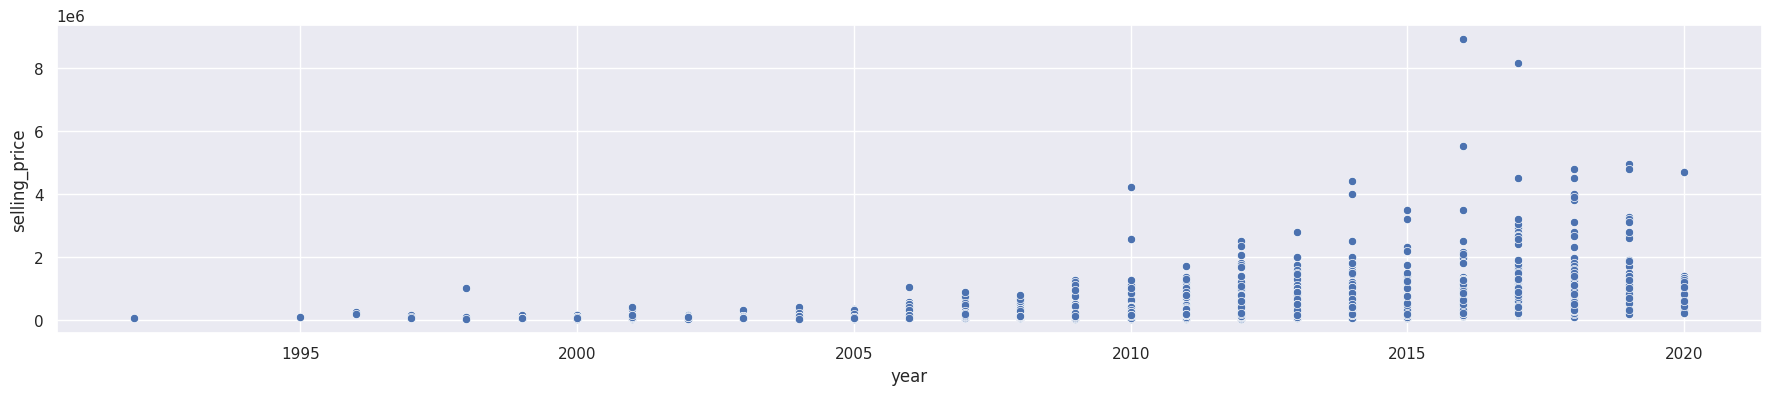

In [68]:
sns.scatterplot(data=df, x='year', y='selling_price')
# Year does not have any distribution.

<Axes: xlabel='seller_type', ylabel='selling_price'>

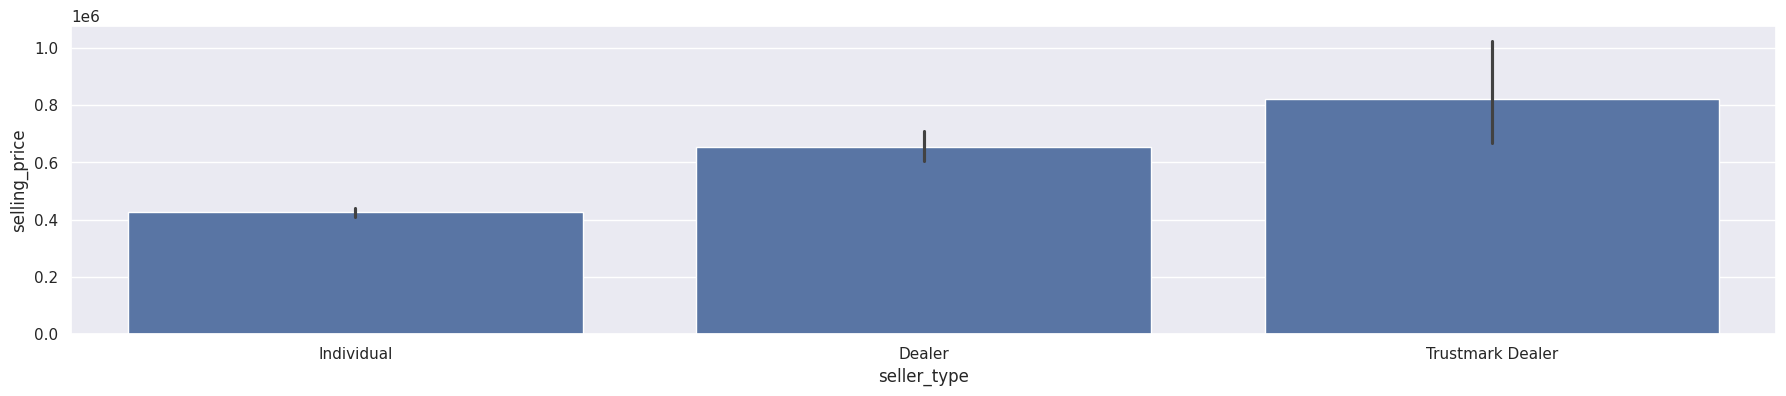

In [70]:
sns.barplot(x ='seller_type', y ='selling_price', data = df)

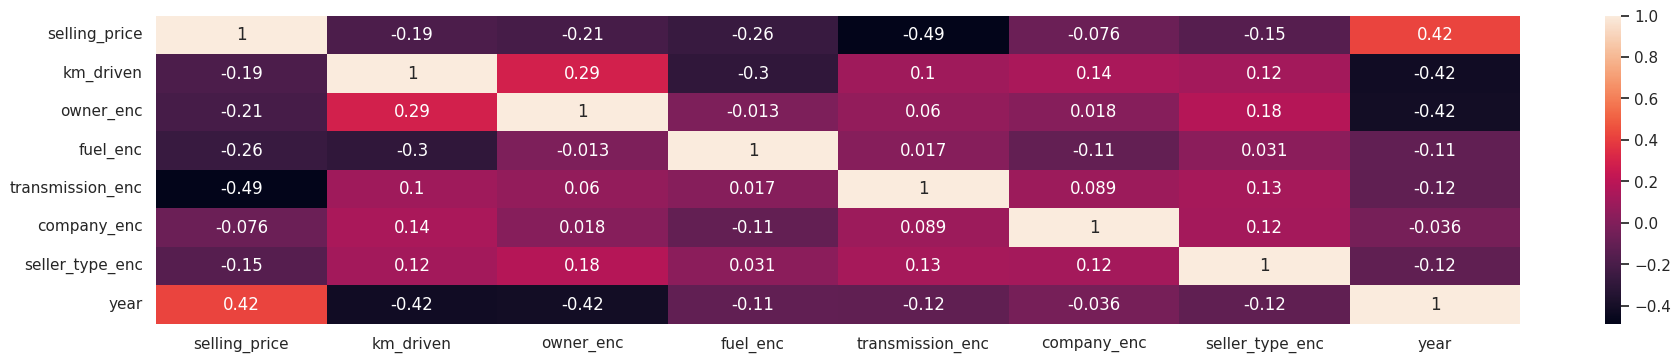

In [79]:
corr = df[['selling_price','km_driven','owner_enc','fuel_enc','transmission_enc','company_enc','seller_type_enc','year']].corr()
sns.heatmap(corr, annot=True)
plt.show()